# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - myeloids - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240227

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import numpy as np
            #import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats
import muon as mu
from muon import atac as ac
from muon import prot

In [2]:
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [3]:
input = '/home/acirnu/data/ACM_cardiac_leuco/5_Leiden_clustering_and_annotation/ACM_myeloids_clustered_mergesomeclusters_muon_ac240415.raw.h5mu'
mdata_data = mu.read_h5mu(input)
mdata_data

MuData object with n_obs × n_vars = 34482 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	34482 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'dendrogram_leiden', 'leiden_colors', 'log1p', 'rank_genes_groups'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    prot:	34482 x 99
      obs:	'library', 'batch'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [4]:
adata = mdata_data.mod["rna"]
adata

AnnData object with n_obs × n_vars = 34482 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    uns: 'C_scANVI_colors', 'classification_colors', 'dendrogram_leiden', 'leiden_colors', 'log1p', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs

,cell_source,donor,n_counts,sample,seed_labels,condition,genotype,infection,library,model,...,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,batch,C_scANVI,leiden,classification
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.000000,0.0,-0.019995,-0.083225,6,2,reference,LYVE1+MØ,12,LYVE1+MØ_12
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,DOCK4+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.025940,0.0,-0.169221,-0.390143,6,1,reference,DOCK4+MØ,2,DOCK4+MØ_2
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.051323,0.0,-0.317631,-0.578955,7,4,reference,Monocytes,3,Monocytes_3
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.014110,0.0,-0.370103,-0.370084,7,2,reference,LYVE1+MØ,0,LYVE1+MØ_0
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.040006,0.0,-0.142503,-0.357287,7,2,reference,LYVE1+MØ,0,LYVE1+MØ_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGTTAGTA-1-B2,AG_Gerull,Ttn_HetKO_MCMV_1,4226.0,Ttn_HetKO_MCMV_1,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,0.141978,0.0,-0.373712,-0.402608,25,7,query,Neutrophils,11,Neutrophils_11
TTTGTTGCAAGCTCTA-1-B2,AG_Gerull,Ttn_Ctr_noninf_1,3733.0,Ttn_Ctr_noninf_1,Unknown,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,Ttn,...,0.000000,0.0,-0.179842,-0.495021,23,7,query,DOCK4+MØ,2,DOCK4+MØ_2
TTTGTTGGTACAGGTG-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,24293.0,Ttn_Ctr_MCMV_2,Unknown,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,...,0.000000,13.0,-0.435458,-0.744327,21,7,query,MØ_general,0,MØ_general_0
TTTGTTGTCCCAGGAC-1-B2,AG_Gerull,Ttn_Ctr_noninf_2,6388.0,Ttn_Ctr_noninf_2,Unknown,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,Ttn,...,0.140889,0.0,0.080642,-0.877899,24,7,query,MØ_general,0,MØ_general_0


In [6]:
new_order_genotype = ['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO']
adata.obs["genotype"] = adata.obs["genotype"].cat.reorder_categories(new_order_genotype, ordered=True)

adata.obs["genotype"].cat.categories

Index(['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO'], dtype='object')

In [7]:
new_order_infection = ['noninf', 'MCMV']
adata.obs["infection"] = adata.obs["infection"].cat.reorder_categories(new_order_infection, ordered=True)

adata.obs["infection"].cat.categories

Index(['noninf', 'MCMV'], dtype='object')

In [8]:
new_order_condition = ['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV', 'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf','Ttn_Ctr_MCMV', 'Ttn_HetKO_MCMV' ]
adata.obs["condition"] = adata.obs["condition"].cat.reorder_categories(new_order_condition, ordered=True)

adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV',
       'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf', 'Ttn_Ctr_MCMV',
       'Ttn_HetKO_MCMV'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [9]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="classification",
    sample_identifier="sample",
    covariate_obs=["condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 34512 × 29436
  2 modalities
    rna:	34482 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'dendrogram_leiden', 'leiden_colors', 'log1p', 'rank_genes_groups'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    coda:	30 x 58
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'

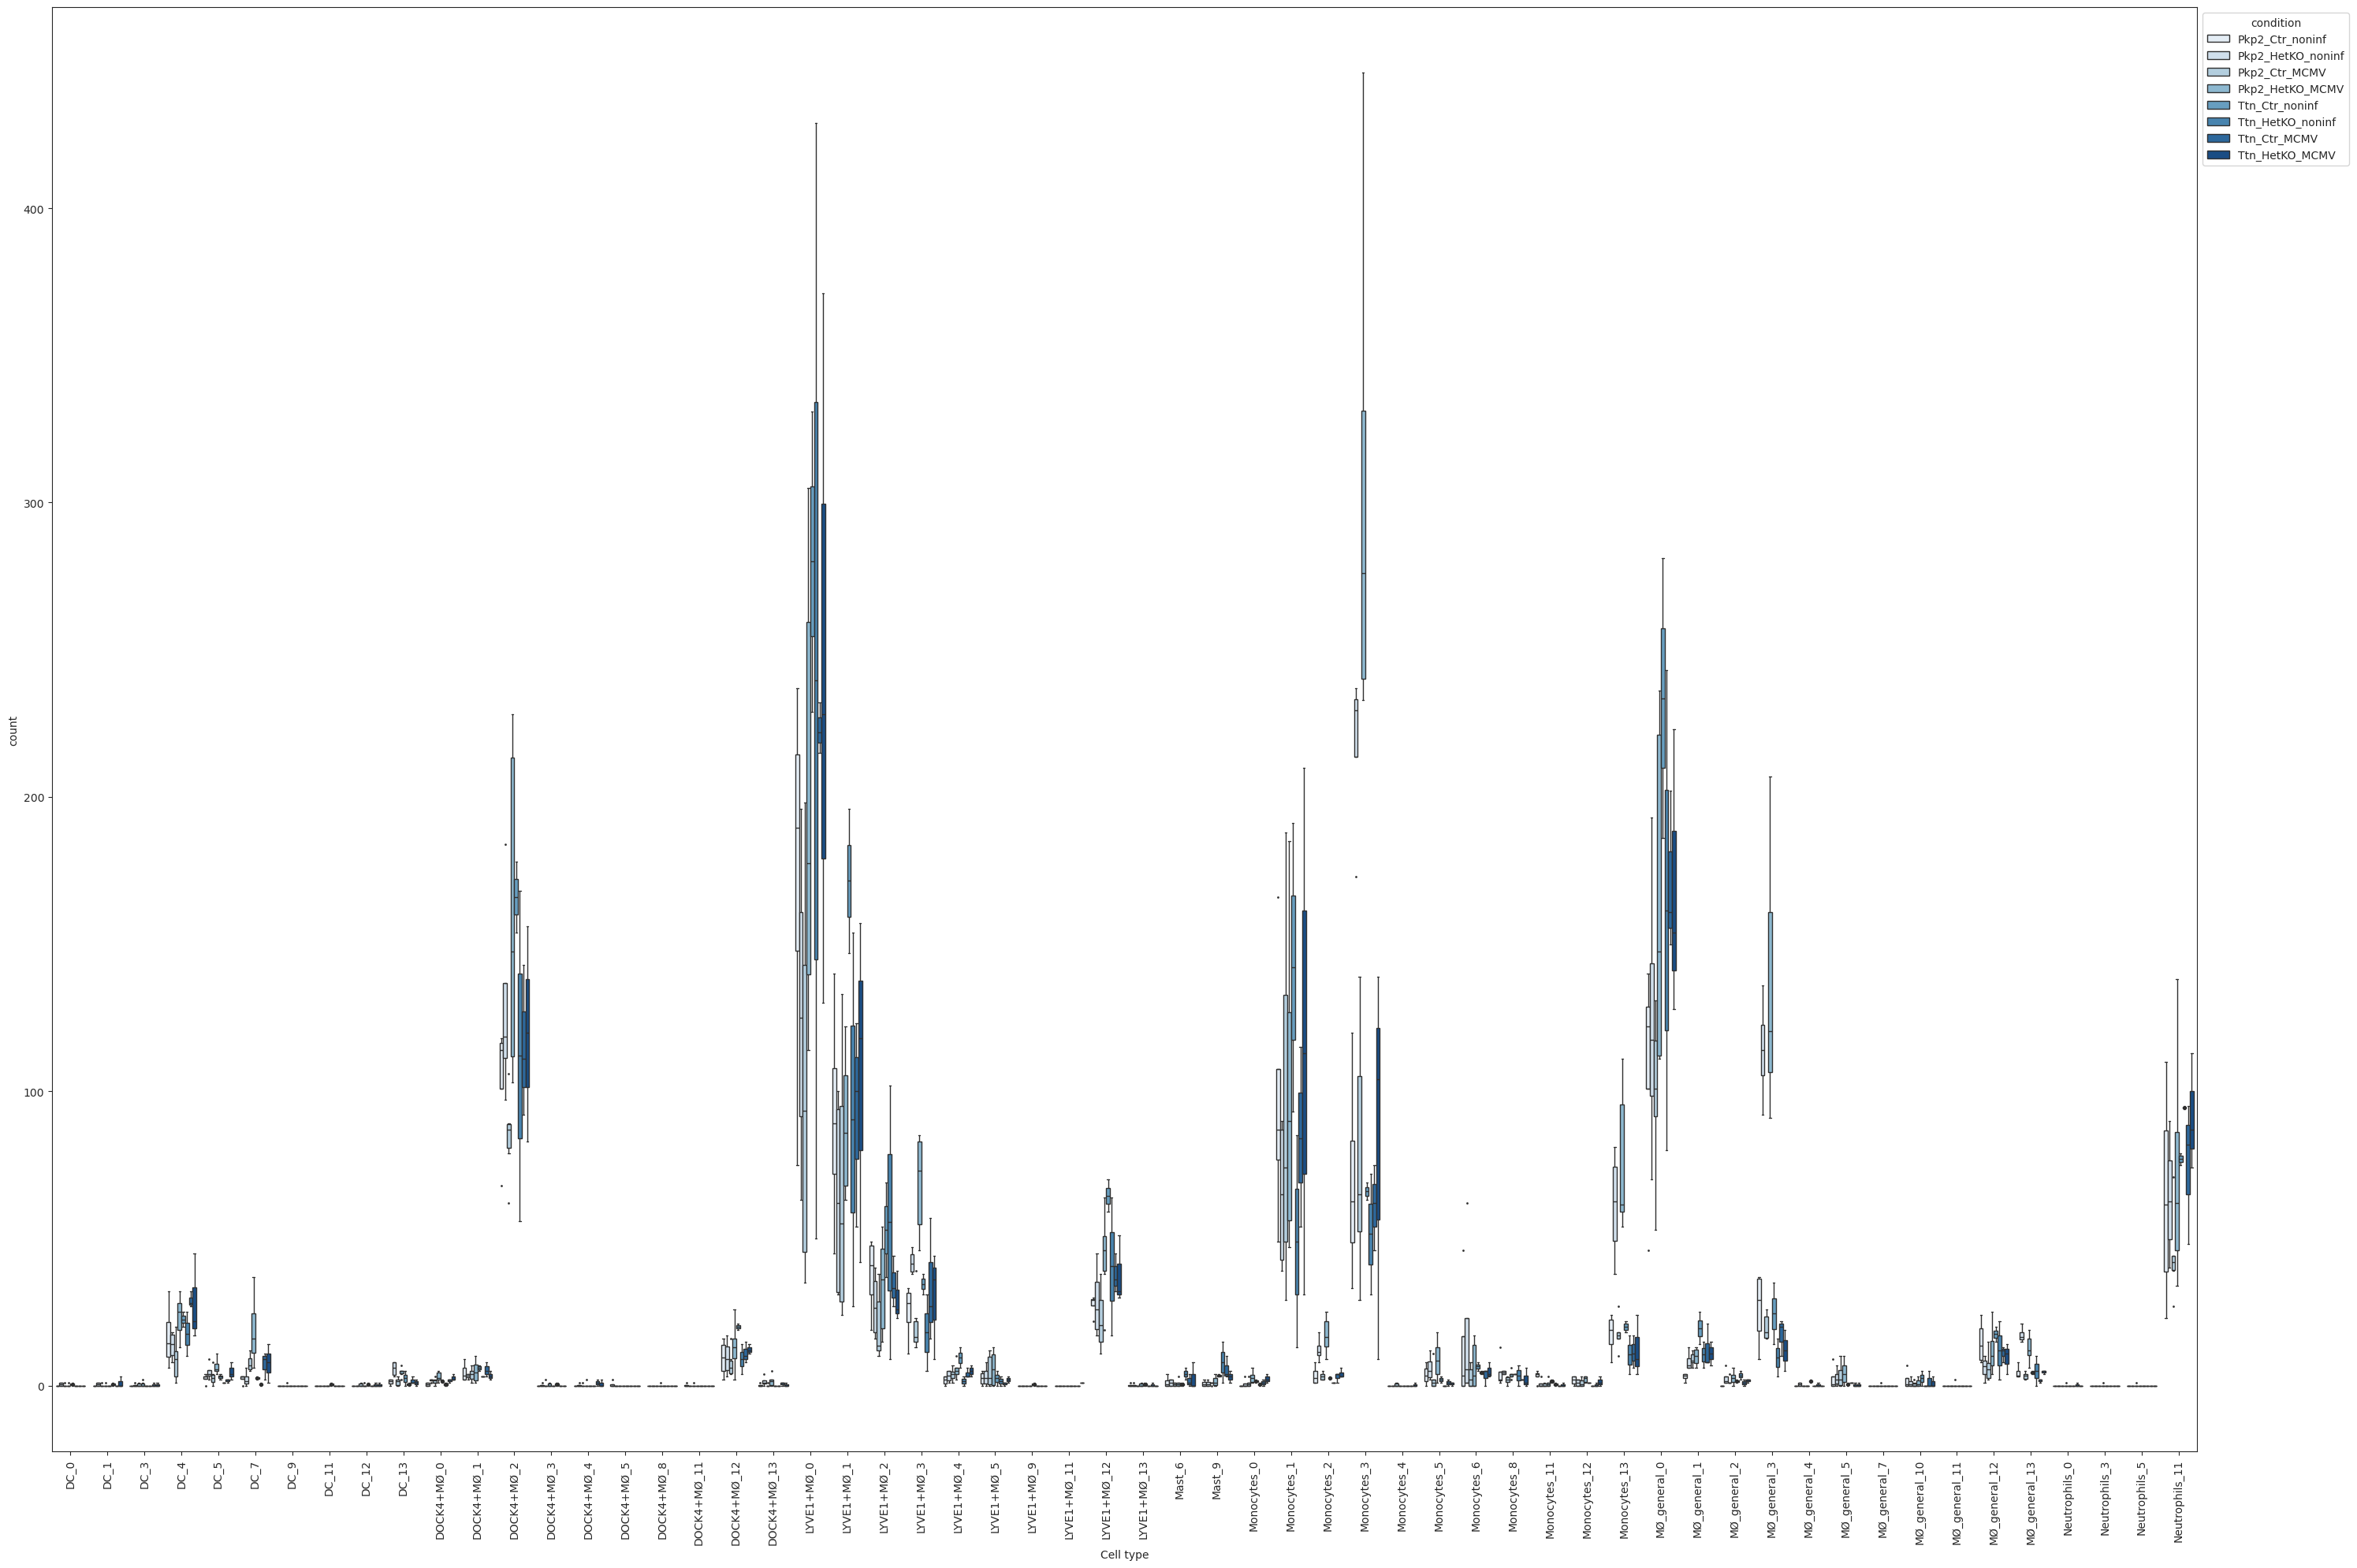

In [10]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="condition",
    y_scale="count",
    figsize=(30, 20),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

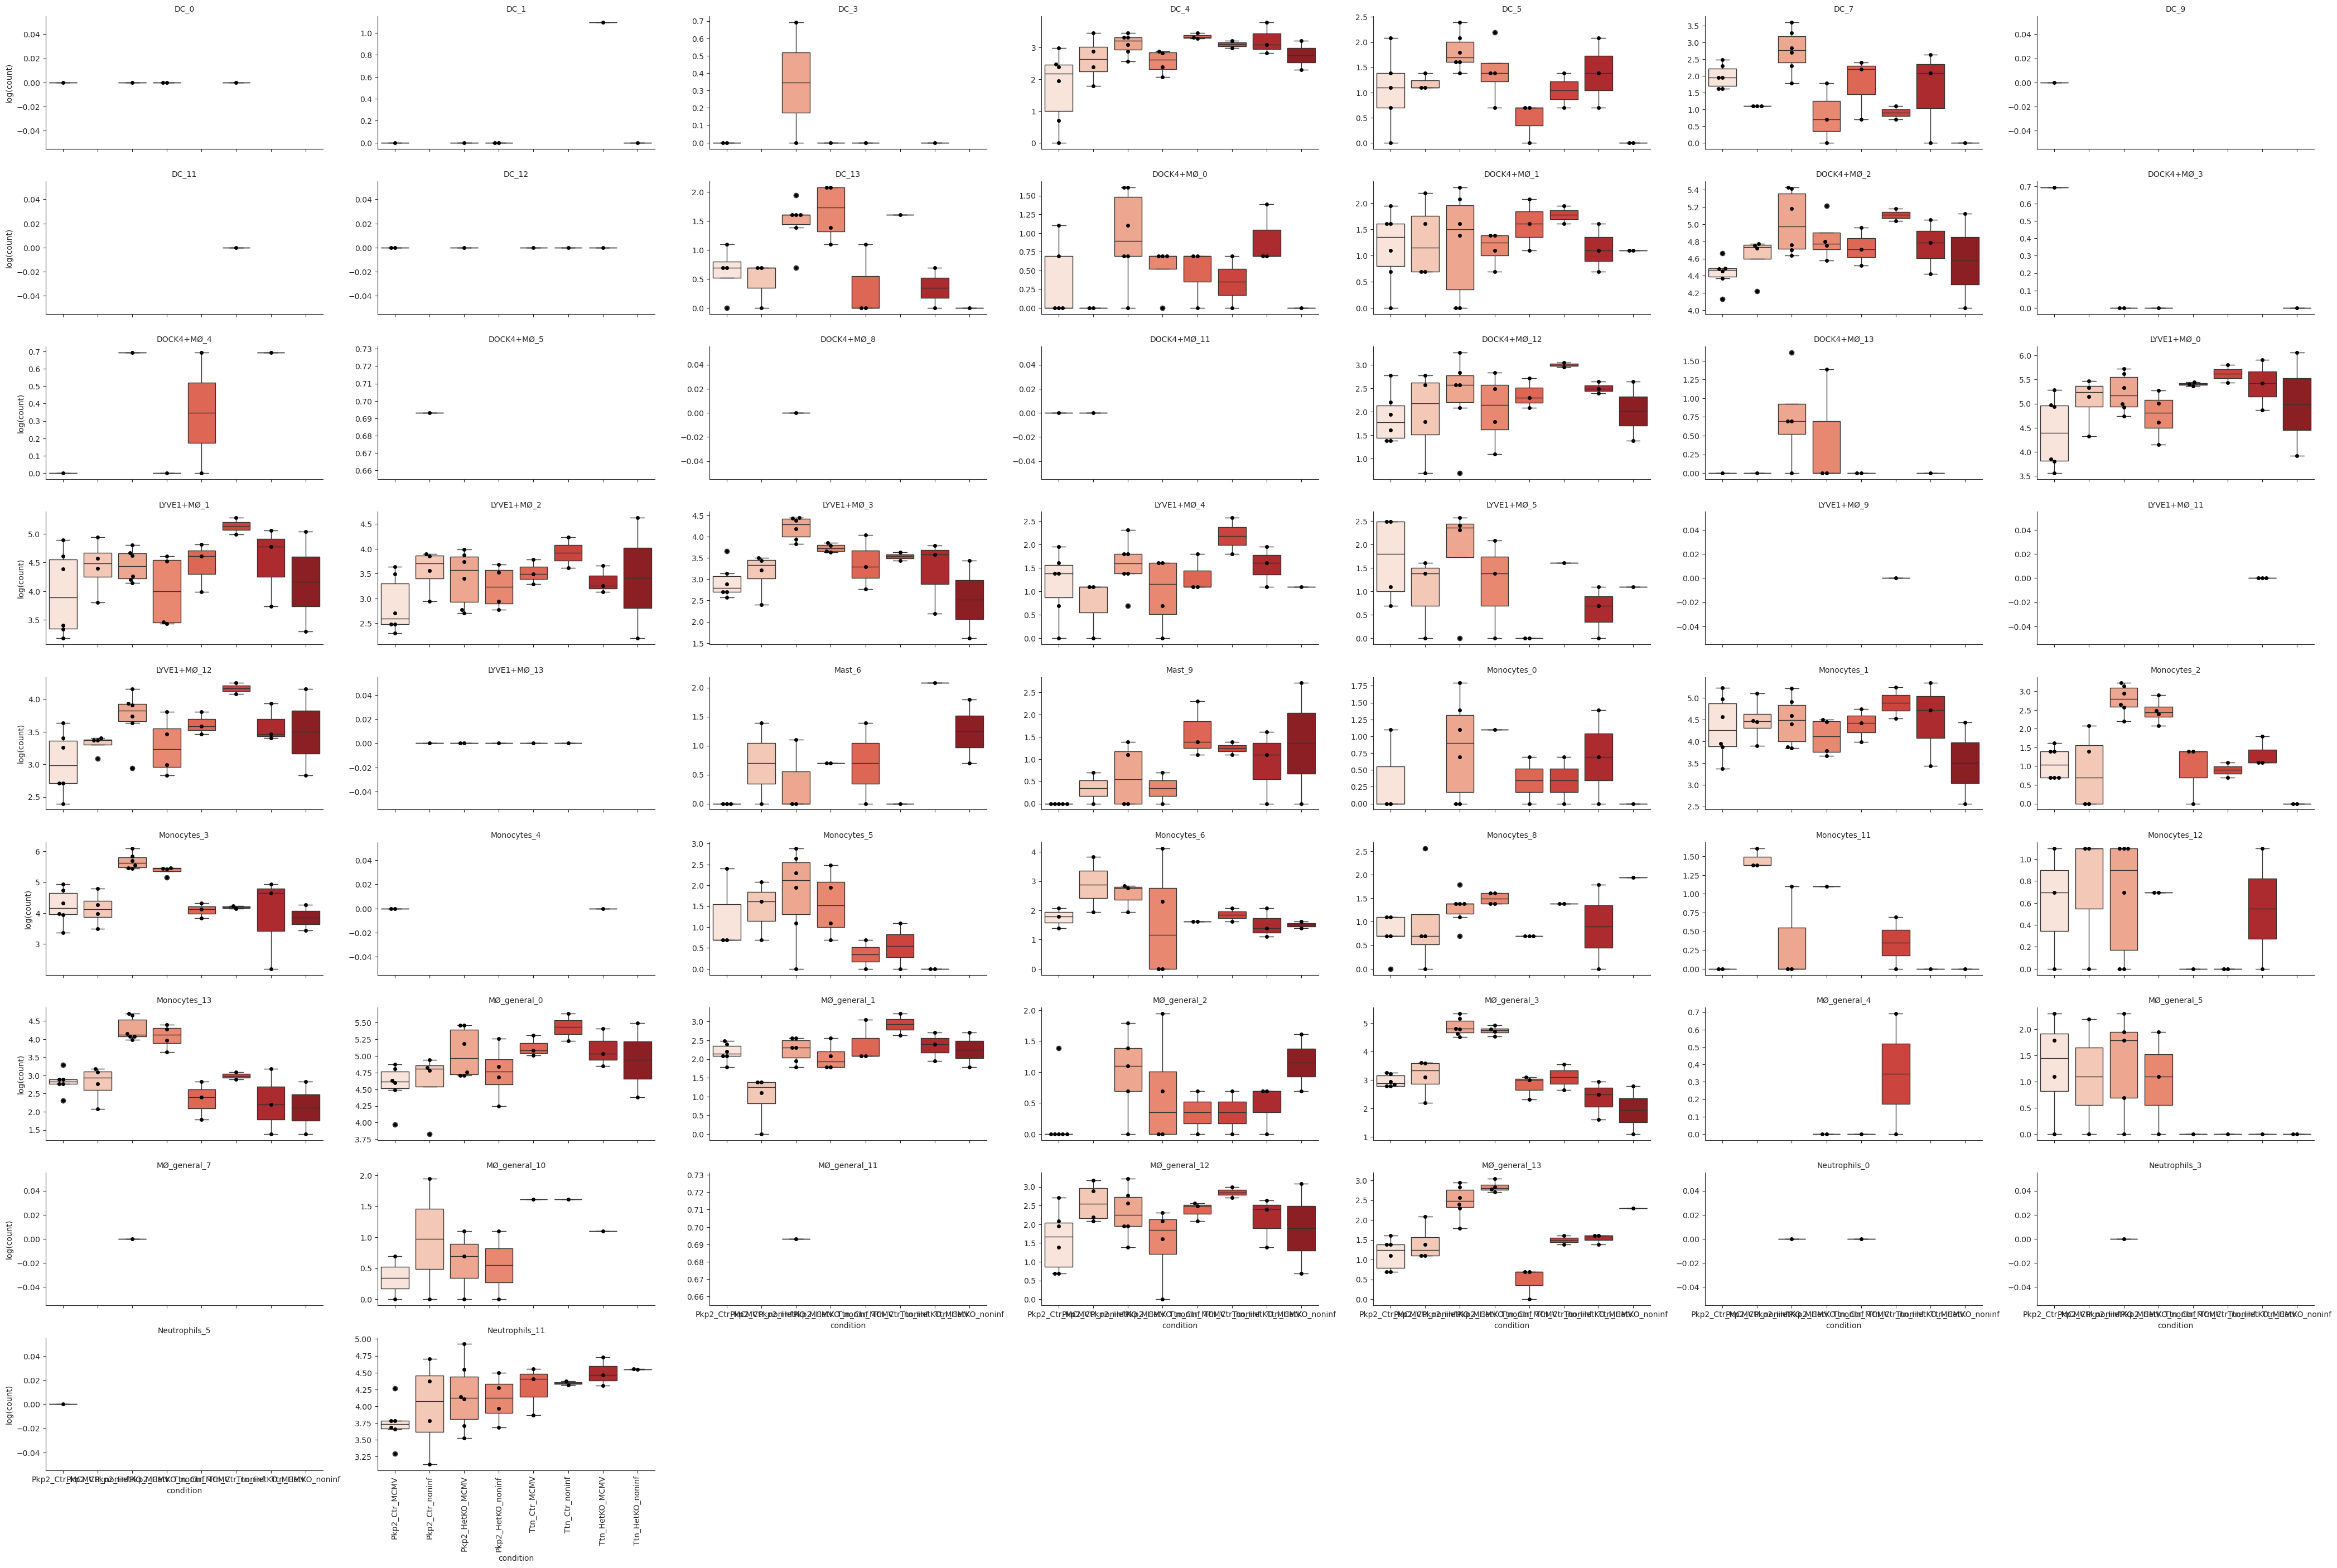

In [11]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="condition",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.xticks(rotation=90)
plt.show()

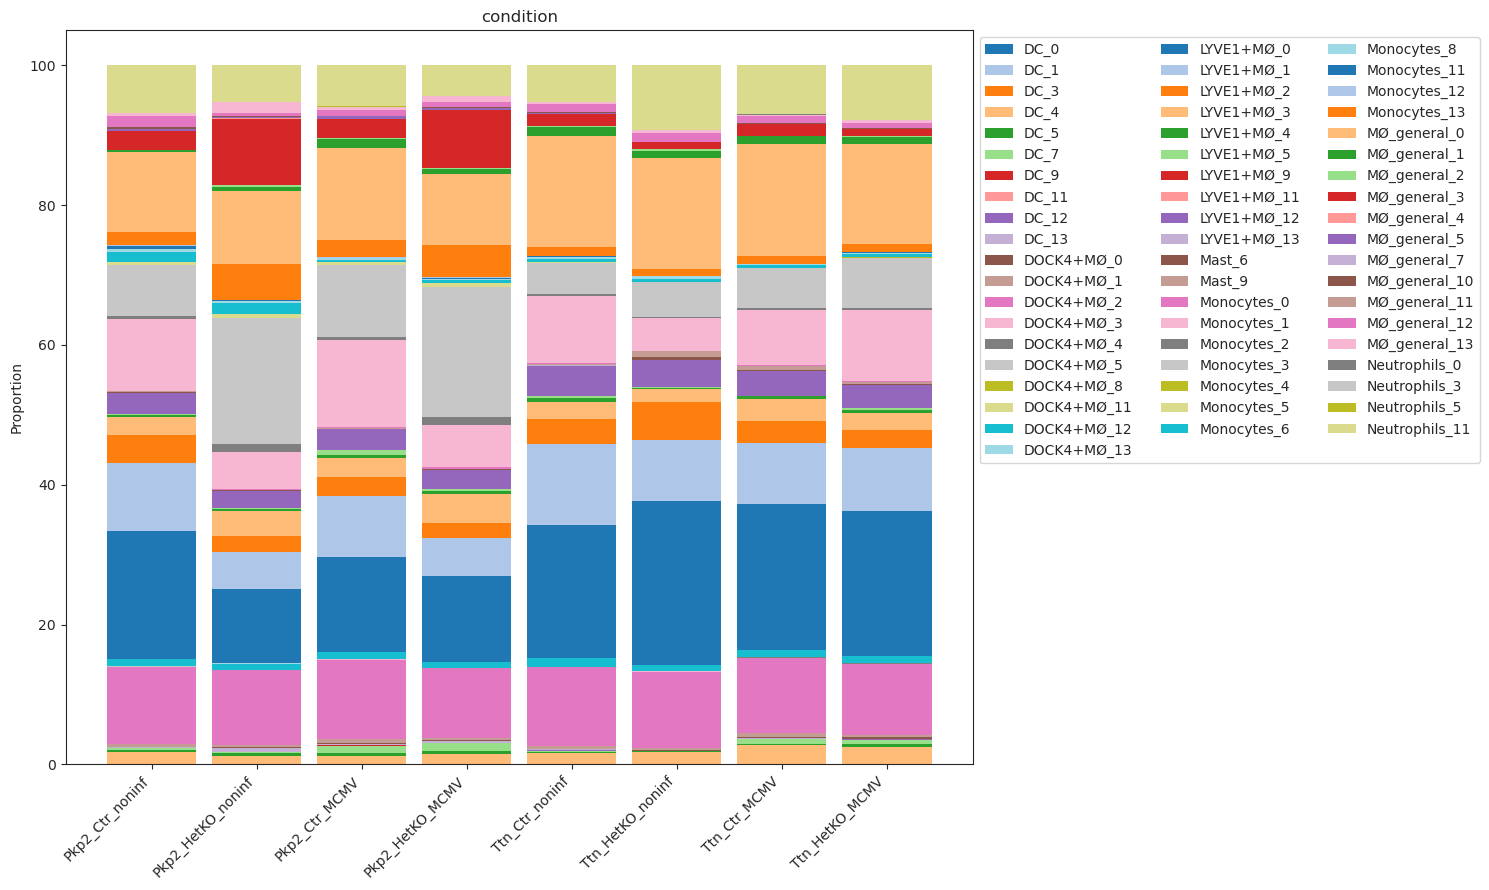

In [12]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="condition", figsize=(15, 9) 
)
plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [13]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="condition",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

Automatic reference selection! Reference cell type set to DOCK4+MØ_1

Zero counts encountered in data! Added a pseudocount of 0.5.

AnnData object with n_obs × n_vars = 30 × 58
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

Run No-U-turn HMC sampling (nuts)

In [14]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
sample: 100%|██████████| 11000/11000 [34:47<00:00,  5.27it/s, 1023 steps of size 6.67e-05. acc. prob=0.91]


In [15]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 30 × 58
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_condition[T.Pkp2_HetKO_noninf]', 'effect_df_condition[T.Pkp2_Ctr_MCMV]', 'effect_df_condition[T.Pkp2_HetKO_MCMV]', 'effect_df_condition[T.Ttn_Ctr_noninf]', 'effect_df_condition[T.Ttn_HetKO_noninf]', 'effect_df_condition[T.Ttn_Ctr_MCMV]', 'effect_df_condition[T.Ttn_HetKO_MCMV]'

#### Result interpreteation

**Intercepts**

The first column of the intercept summary shows the parameters determined by the MCMC inference.

The “Expected sample” column gives some context to the numerical values. If we had a new sample (with no active covariates) with a total number of cells equal to the mean sampling depth of the dataset, then this distribution over the cell types would be most likely.

**Effects**

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

Since the numerical values of the “Final Parameter” column are not straightforward to interpret, the “Expected sample” and “log2-fold change” columns give us an idea on the magnitude of the change. The expected sample is calculated for each covariate separately (covariate value = 1, all other covariates = 0), with the same method as for the intercepts. The log-fold change is then calculated between this expected sample and the expected sample with no active covariates from the intercept section. Since the data is compositional, cell types for which no credible change was detected, can still change in abundance as well, as soon as a credible effect is detected on another cell type due to the sum-to-one constraint. If there are no credible effects for a covariate, its expected sample will be identical to the intercept sample, therefore the log2-fold change is 0.

In [16]:
sccoda_model.summary(sccoda_data, modality_key= "coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 30 samples, 58 cell types                                    │
│ Reference cell type                        │ DOCK4+MØ_1                                                         │
│ Formula                                    │ condition                                                          │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                 Final Parameter  Expected Sample                                                                │
│ Cell Type                                                                                                       │
│ DC_0                -0.565            1.143                                                                     │
│ DC_1                -0.510            1.208                                                                     │
│ DC_3                -0.478            1.247                                                                     │
│ DC_4                 2.279           19.644                                                                     │
│ DC_5                 0.364            2.894                                                                     │
│ DC_7                 1.274            7.191                                                                     │
│ DC_9                -0.703            0.996                                                                     │
│ DC_11               -0.319            1.462                                                                     │
│ DC_12               -0.572            1.135                                                                     │
│ DC_13                0.494            3.296                                                                     │
│ DOCK4+MØ_0           0.324            2.781                                                                     │
│ DOCK4+MØ_1           0.824            4.585                                                                     │
│ DOCK4+MØ_2           4.157          128.481                                                                     │
│ DOCK4+MØ_3          -0.207            1.635                                                                     │
│ DOCK4+MØ_4          -0.210            1.630                                                                     │
│ DOCK4+MØ_5          -0.636            1.065                                                                     │
│ DOCK4+MØ_8          -0.506            1.213                                                                     │
│ DOCK4+MØ_11         -0.560            1.149                                                                     │
│ DOCK4+MØ_12          1.826           12.488                                                                     │
│ DOCK4+MØ_13          0.089            2.199                                                                     │
│ LYVE1+MØ_0           4.513          183.421                                                                     │
│ LYVE1+MØ_1           3.699           81.270                                                                     │
│ LYVE1+MØ_2           2.881           35.866                                                                     │
│ LYVE1+MØ_3           2.843           34.528                                                                     │
│ LYVE1+MØ_4           0.890            4.898                                                                     │
│ LYVE1+MØ_5           0.500            3.316                                                                     │
│ LYVE1+MØ_9          -0.514            1.203                                                                     │
│ LYVE1+MØ_11         -0.776            0.926                                                                     │
│ LYVE1+MØ_12          3.014           40.968                                                                     │
│ LYVE1+MØ_13         -0.854            0.856           

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                              Final Parameter  Expected Sample  log2-fold change                 │
│ Covariate                    Cell Type                                                                          │
│ conditionT.Pkp2_HetKO_noninf DC_0                 0.097            1.158             0.018                      │
│                              DC_1                -0.019            1.089            -0.150                      │
│                              DC_3                 0.000            1.146            -0.122                      │
│                              DC_4                -0.207           14.676            -0.421                      │
│                              DC_5                -0.167            2.250            -0.364                      │
│                              DC_7                -0.808            2.946            -1.287                      │
│                              DC_9                 0.232            1.154             0.213                      │
│                              DC_11               -0.102            1.213            -0.270                      │
│                              DC_12                0.183            1.252             0.141                      │
│                              DC_13                0.384            4.447             0.432                      │
│                              DOCK4+MØ_0           0.000            2.556            -0.122                      │
│                              DOCK4+MØ_1           0.000            4.213            -0.122                      │
│                              DOCK4+MØ_2           0.000          118.069            -0.122                      │
│                              DOCK4+MØ_3           0.000            1.503            -0.122                      │
│                              DOCK4+MØ_4           0.000            1.498            -0.122                      │
│                              DOCK4+MØ_5           0.065            1.044            -0.029                      │
│                              DOCK4+MØ_8           0.000            1.114            -0.122                      │
│                              DOCK4+MØ_11          0.136            1.209             0.074                      │
│                              DOCK4+MØ_12         -0.563            6.538            -0.934                      │
│                              DOCK4+MØ_13         -0.079            1.868            -0.235                      │
│                              LYVE1+MØ_0          -0.285          126.777            -0.533                      │
│                              LYVE1+MØ_1           0.000           74.684            -0.122                      │
│                              LYVE1+MØ_2          -0.207           26.803            -0.420                      │
│                              LYVE1+MØ_3           0.000           31.730            -0.122                      │
│                              LYVE1+MØ_4           0.284            5.980             0.288                      │
│                              LYVE1+MØ_5          -0.281            2.302            -0.527                      │
│                              LYVE1+MØ_9           0.061            1.175            -0.033                      │
│                              LYVE1+MØ_11          0.000            0.851            -0.122                      │
│                              LYVE1+MØ_12         -0.377           25.833            -0.665                      │
│                              LYVE1+MØ_13          0.00

### Filter out credible effects

In [17]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate                       Cell Type     
condition[T.Pkp2_HetKO_noninf]  DC_0               True
                                DC_1               True
                                DC_3              False
                                DC_4               True
                                DC_5               True
                                                  ...  
condition[T.Ttn_HetKO_MCMV]     MØ_general_13      True
                                Neutrophils_0     False
                                Neutrophils_3     False
                                Neutrophils_5      True
                                Neutrophils_11    False
Name: Final Parameter, Length: 406, dtype: bool

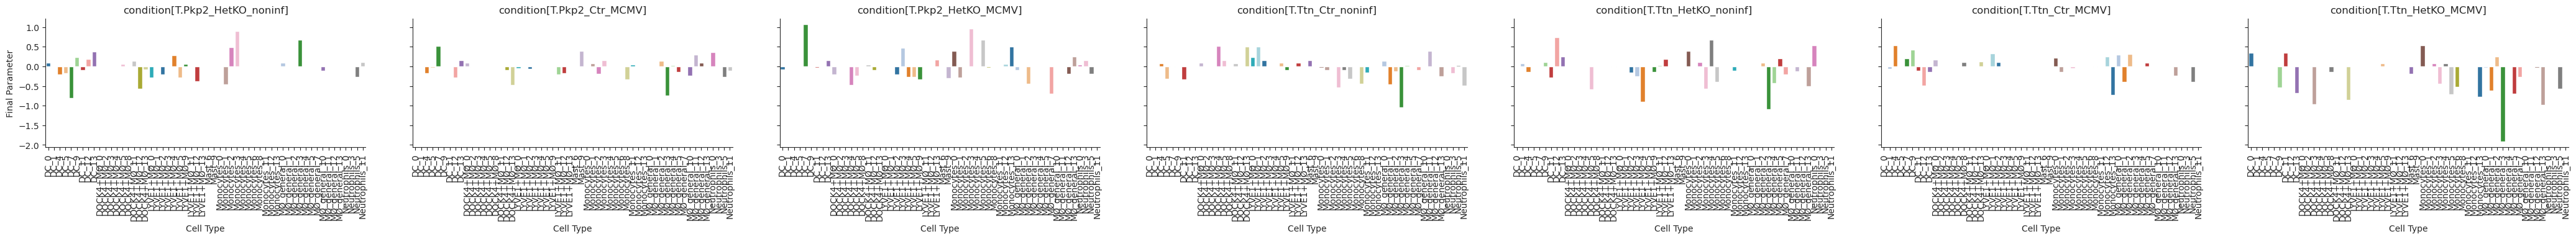

In [18]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key="coda", parameter="Final Parameter")

##### Adjust the "false discovery rate"

In [19]:
sccoda_data

MuData object with n_obs × n_vars = 34512 × 29436
  2 modalities
    rna:	34482 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'dendrogram_leiden', 'leiden_colors', 'log1p', 'rank_genes_groups'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    coda:	30 x 58
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_condition[T.Pkp2_HetKO_noninf]', 'effect_df_condition[T.Pkp2_Ctr_MCMV]', 'effect_df_condition[T.Pkp2_HetKO_MCMV]', 'effect_df_condition[T.Ttn_Ctr_noninf]', 'effect_df_condition[T.Ttn_HetKO_noninf]', 'effect_df_condition[T.Ttn_Ctr_MCMV]', 'effect_df_condition[T.Ttn_HetKO_MCMV]'

In [20]:
sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_noninf]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
DC_0,0.097105,0.000,0.199,0.075,0.9892,1.157632,0.018169
DC_1,-0.019263,-0.037,-0.002,0.010,0.9968,1.088727,-0.149714
DC_3,0.000000,NaN,NaN,0.000,0.0000,1.145994,-0.121923
DC_4,-0.207034,-0.260,-0.153,0.028,1.0000,14.676365,-0.420610
DC_5,-0.167451,-0.184,-0.153,0.009,1.0000,2.249755,-0.363504
DC_7,-0.807873,-0.852,-0.775,0.021,1.0000,2.945855,-1.287438
DC_9,0.232282,0.196,0.255,0.018,1.0000,1.154369,0.213189
DC_11,-0.102397,-0.171,-0.049,0.037,1.0000,1.212731,-0.269651
DC_12,0.182536,0.119,0.257,0.044,1.0000,1.252082,0.141421


In [21]:
sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_MCMV]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
DC_0,-0.078100,-0.106,-0.051,0.018,1.0000,0.931443,-0.295468
DC_1,0.000000,NaN,NaN,0.000,0.0000,1.064047,-0.182794
DC_3,0.000000,NaN,NaN,0.000,0.0000,1.098647,-0.182794
DC_4,0.003485,0.000,0.001,0.002,0.2012,17.366873,-0.177766
DC_5,0.000000,NaN,NaN,0.000,0.0000,2.549964,-0.182794
DC_7,1.072103,0.978,1.154,0.050,1.0000,18.507616,1.363923
DC_9,0.000000,NaN,NaN,0.000,0.0000,0.877287,-0.182794
DC_11,-0.033267,-0.037,-0.001,0.011,1.0000,1.245843,-0.230789
DC_12,0.000000,NaN,NaN,0.000,0.0000,1.000079,-0.182794


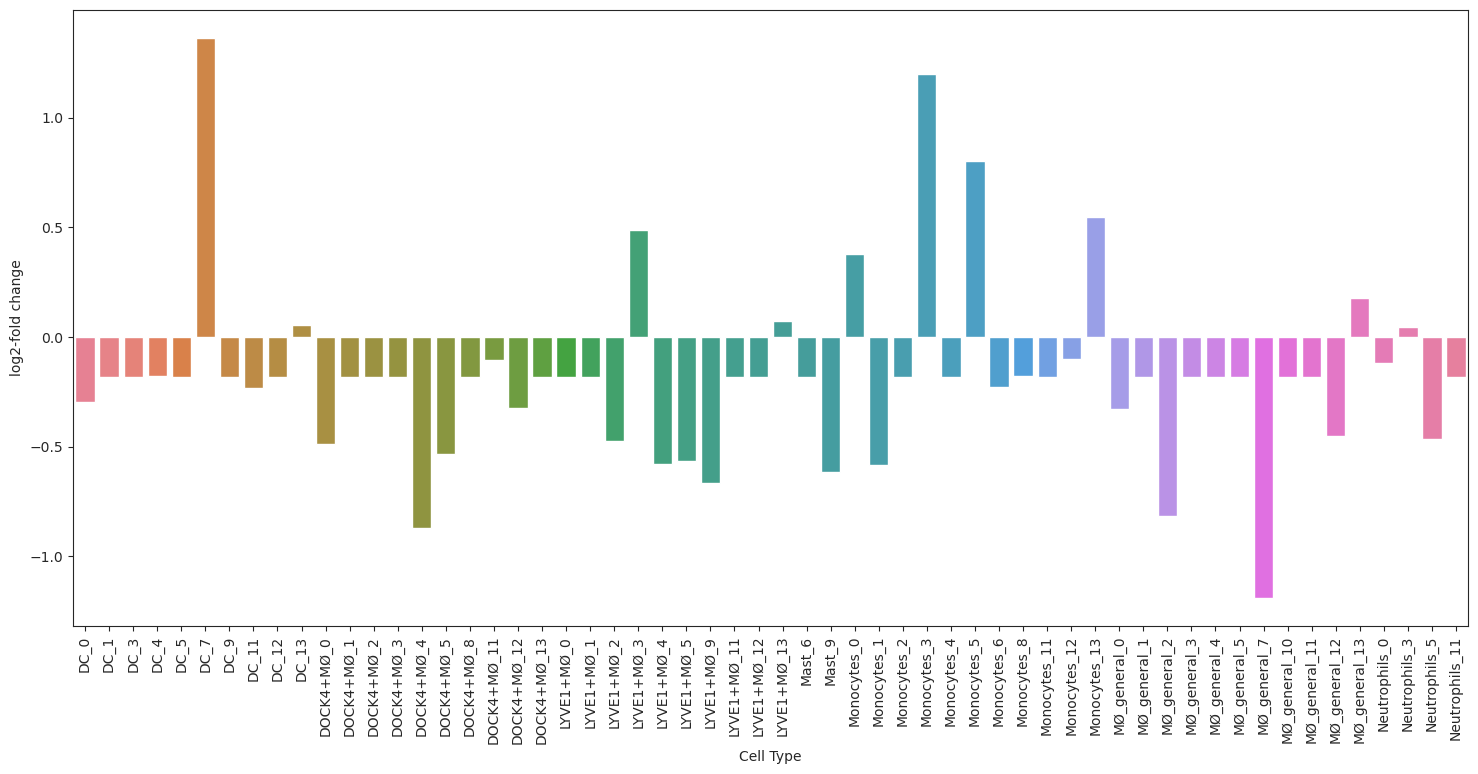

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_MCMV]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.show()

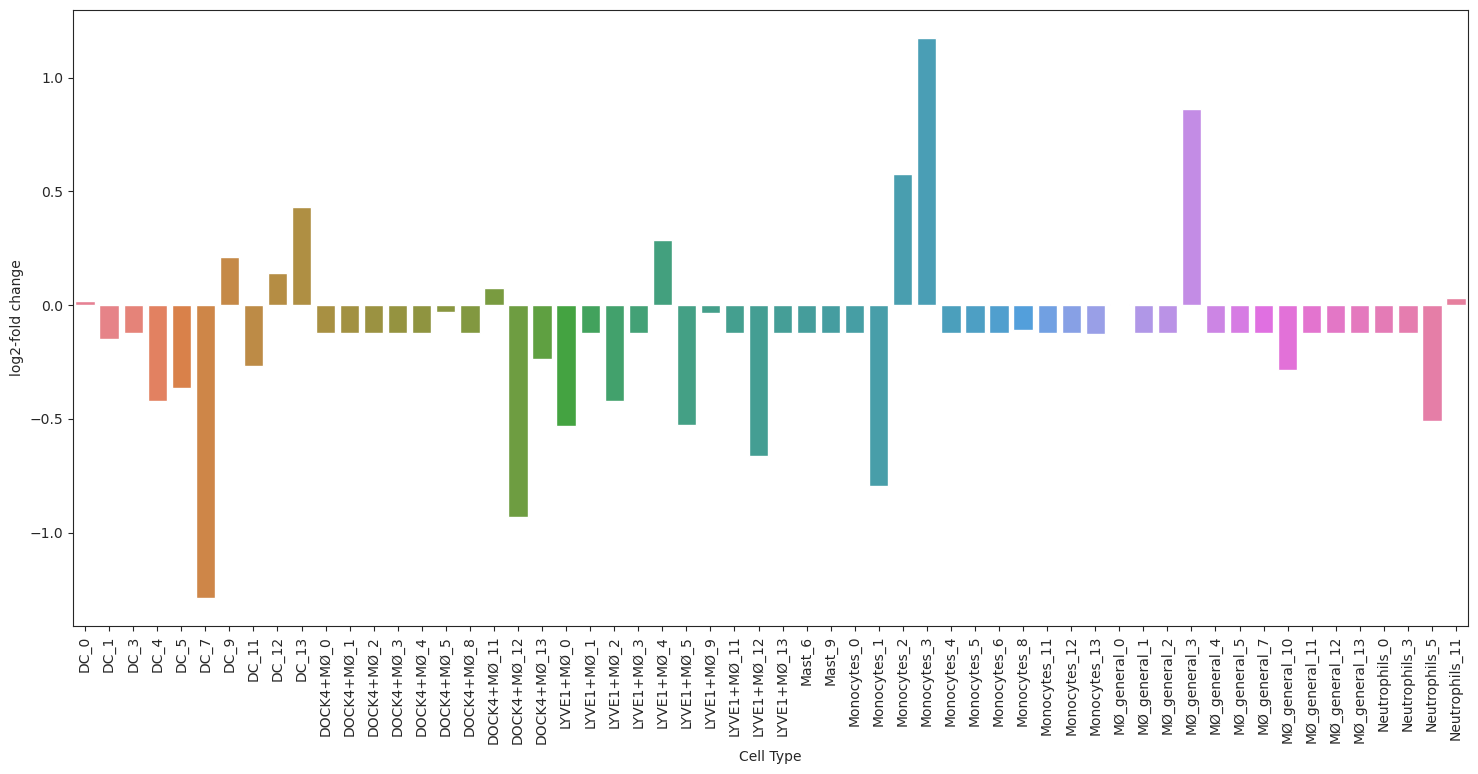

In [23]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_noninf]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.show()

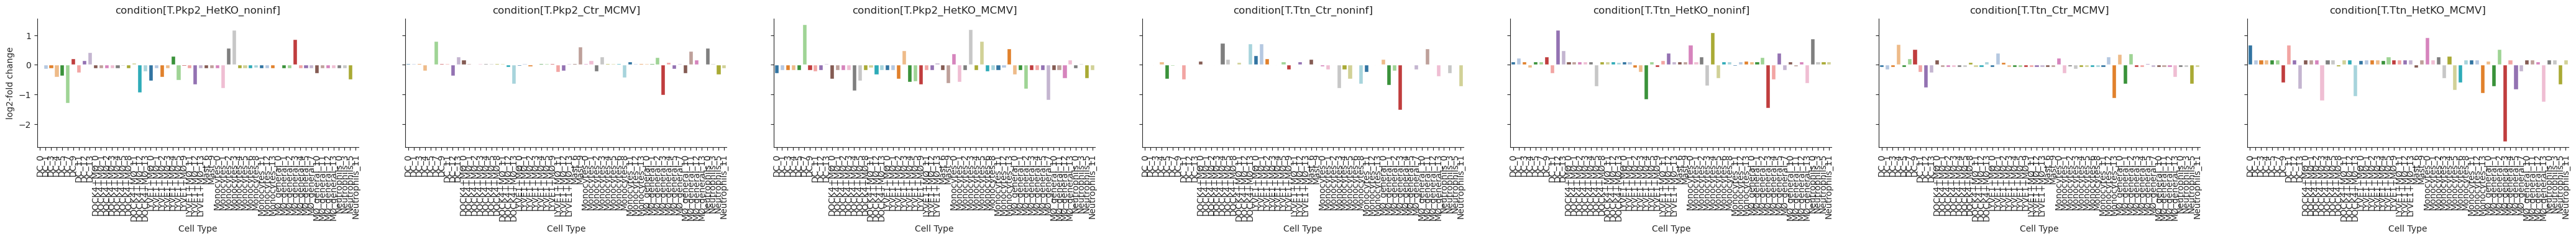

In [24]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "condition")
plt.show()